# 1 Business Understanding 
### 1.1 Business Overview
The telecommunications industry is one of the most competitive sectors worldwide, where customer retention plays a critical role in profitability and long-term sustainability. While acquiring new customers is costly, retaining existing ones is significantly more profitable (Propello, 2024).Globally, churn rates in telecom average around 31% annually, with mobile churn around 20%, highlighting the magnitude of the challenge.

Within Syria, the mobile telecom market is dominated by two key players: Syriatel and MTN-Syria. Syriatel, founded in 2000, currently holds about 71% of the market share and reported 20% revenue growth in 2019, equivalent to SYP 221bn (~US$242m) . Despite its dominance, Syriatel faces challenges from economic sanctions, instability, and increasing customer expectations for service quality, pricing, and personalization.
(The Syria Report, 2020),For this reason, understanding what factors drive churn and how to reduce it is a key business priority.

Churn in this context refers to the proportion of customers who stop using Syriatel’s services, either by terminating contracts or switching to competitors. Understanding and reducing churn is crucial for Syriatel’s financial health and market leadership.
### 1.2 Problem Statement
Syriatel is experiencing customer churn that directly threatens its revenues and market position. While it has historically maintained a strong market share, rising competition, service quality issues, evolving customer demands, and broader political-economic instability increase the likelihood of customer attrition. Without effective churn prediction and retention strategies, Syriatel risks losing valuable customers, resulting in revenue loss, reduced market share, and diminished competitiveness.
### 1.3 Business Objective
#### 1.3.1 Main objective:
To develop a machine learning classifier that predicts whether a Syriatel customer is likely to churn, enabling data-driven strategies for proactive retention.
#### 1.3.2 Specific objectives:
1. To explore customer demographics and usage behaviour influencing churn.
2. To determine how charges influence customer churn
3. To develop and evaluate machine learning models that classify whether a customer is likely to churn.
4. optimize the models for best perfomance.
5. To provide actionable insights that support Syriatel in designing targeted retention campaigns (e.g., loyalty programs, personalized offers).
### 1.4 Research Questions
1. how does customer demographics and usage behaviour influence churn?
2. how charges influence customer churn?
3. what machine learning models best predict whether a customer is likely to churn.
4. Which optimization techniques and modeling approaches most effectively improve the predictive performance of machine learning model
5. How can predictive insights be applied to practical retention strategies to minimize churn?
### 1.5 Success Criteria
- Model Performance: Achieve at least 85% accuracy and a high AUC score (>0.85) in predicting churn.
- Business Impact: Provide insights that reduce churn rates by enabling proactive retention strategies, targeting high-risk customers before they leave.




## 2. Data Understanding
### 2.1 Data overview
The dataset is from kaggle with 3333 rows aand 21 columns

### Key Attributes
1. `state`: The state of the customer.
2. `account length`: The length of the account in days .
3. `area code`: The area code of the customer's phone number.
4. `phone number`: The phone number of the customer.
5. `international plan`: Whether the customer has an international plan or not.
6. `voice mail plan`: Whether the customer has a voicemail plan or not.
7. `number vmail messages`: The number of voicemail messages the customer has.
8. `total day minutes`: Total minutes of day calls.
9. `total day calls`: Total number of day calls.
10. `total day charge`: Total charge for the day calls.
11. `total eve minutes`: Total minutes of evening calls.
12. `total eve calls`: Total number of evening calls.
13. `total eve charge`: Total charge for the evening calls.
14. `total night minutes`: Total minutes of night calls.
15. `total night calls`: Total number of night calls.
16. `total night charge`: Total charge for the night calls.
17. `total intl minutes`: Total minutes of international calls.
18. `total intl calls`: Total number of international calls.
19. `total intl charge`: Total charge for the international calls.
20. `customer service calls`: Number of times the customer called customer service.
21. `churn`: Whether the customer churned or not (True/False).


## 3. Data Preparation
### 3.1. Data Cleaning

In [8]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [10]:
# read the data using pandas dataframe
df = pd.read_csv("Syria_tel.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# Checks for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [14]:
# Checks for duplicates
df.duplicated().sum()

0

In [16]:
# Check for column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [20]:
# Draws a summary of our dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##### As we can see from the above, This dataset does not contain any null values, and different columns are of different data types. We will need to check every unique values in the columns `international plan` and `voice mail plan`

In [23]:

df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
df['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [27]:


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate IQR for each column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
outliers.sum()


account length             18
area code                   0
number vmail messages       1
total day minutes          25
total day calls            23
total day charge           25
total eve minutes          24
total eve calls            20
total eve charge           24
total night minutes        30
total night calls          22
total night charge         30
total intl minutes         46
total intl calls           78
total intl charge          49
customer service calls    267
dtype: int64

##### Every numeric columnn of our dataset has outliers. However removing these outliers may bias our analysis and modelling, so we leave the data as it is in terms of outliers.

In [30]:
df["churn"].mean()


0.14491449144914492

##### customers who stayed: is 85.50% while customers who churned is 14.49%

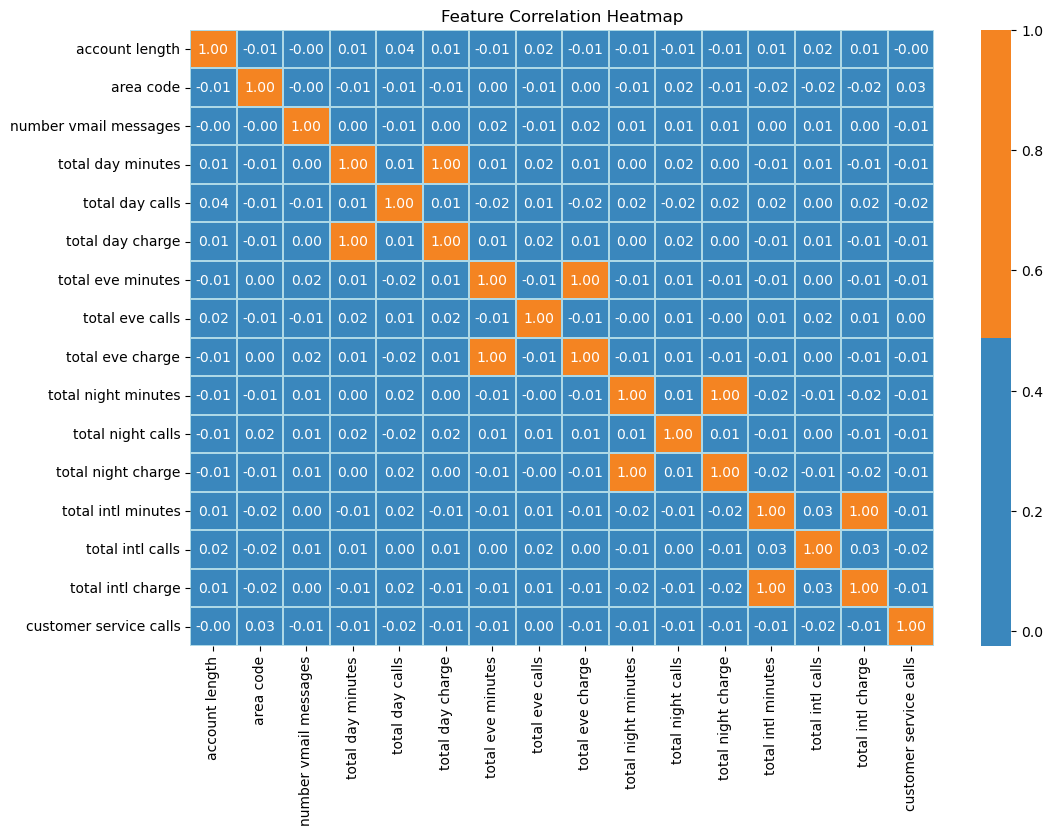

In [40]:
# We visualize the correelation between the different features
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap=sns.color_palette(["#1f76b4e0", "#f37507e3"], as_cmap=True),linewidths=0.2,linecolor='lightblue', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [42]:
corr = df.corr(numeric_only=True)["churn"].sort_values(ascending=False)
print(corr)


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


In [44]:
#Replacing the spaces in column names with _
df.columns = df.columns.str.replace(' ','_')

As for now, we can make the two columns to be of boolean datatype, yes representing True and no representing False

In [46]:
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})


In [48]:
#Drop the phone_number column since we wont be using it.
df=df.drop(["phone_number"], axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [52]:
#perfoming one hot encoding on state and area code

# Columns to encode
encode_cols = ['state', 'area_code']

# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit + transform
encoded = encoder.fit_transform(df[encode_cols])

# Back to DataFrame
encoded_df = pd.DataFrame(encoded, 
                          columns=encoder.get_feature_names_out(encode_cols), 
                          index=df.index)

# Replace original columns with encoded ones
df_encoded = pd.concat([df.drop(encode_cols, axis=1), encoded_df], axis=1)

df_encoded.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# Encoding the target variable churn to a binary classification target
df_encoded['churn']=df_encoded['churn'].astype(int)

In [56]:
print(df_encoded['churn'].unique())

[0 1]


In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   international_plan      3333 non-null   int64  
 2   voice_mail_plan         3333 non-null   int64  
 3   number_vmail_messages   3333 non-null   int64  
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_day_charge        3333 non-null   float64
 7   total_eve_minutes       3333 non-null   float64
 8   total_eve_calls         3333 non-null   int64  
 9   total_eve_charge        3333 non-null   float64
 10  total_night_minutes     3333 non-null   float64
 11  total_night_calls       3333 non-null   int64  
 12  total_night_charge      3333 non-null   float64
 13  total_intl_minutes      3333 non-null   float64
 14  total_intl_calls        3333 non-null   

In [60]:
# checking for imbalanced class in the target variable
# percentage of customers who churned vs those who did not churn.
df_encoded["churn"].value_counts(normalize=True) * 100


churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

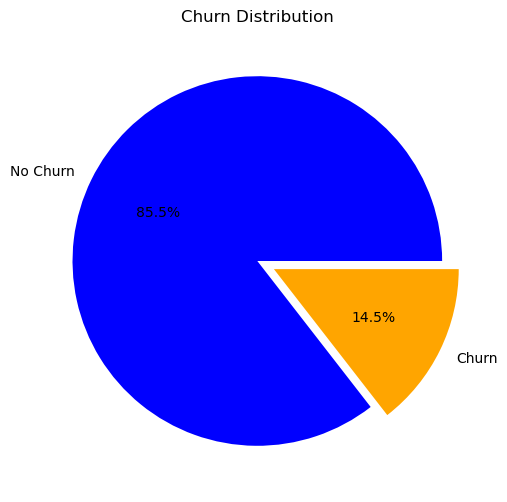

In [74]:
#plotting the class distribution using pie chart showing their proportions
plt.figure(figsize=(6,6))
df_encoded['churn'].value_counts().plot.pie(colors=['blue', 'orange'], labels=['No Churn', 'Churn'], explode=[0, 0.1],autopct='%1.1f%%' )
plt.title('Churn Distribution')
plt.ylabel("")
plt.show()

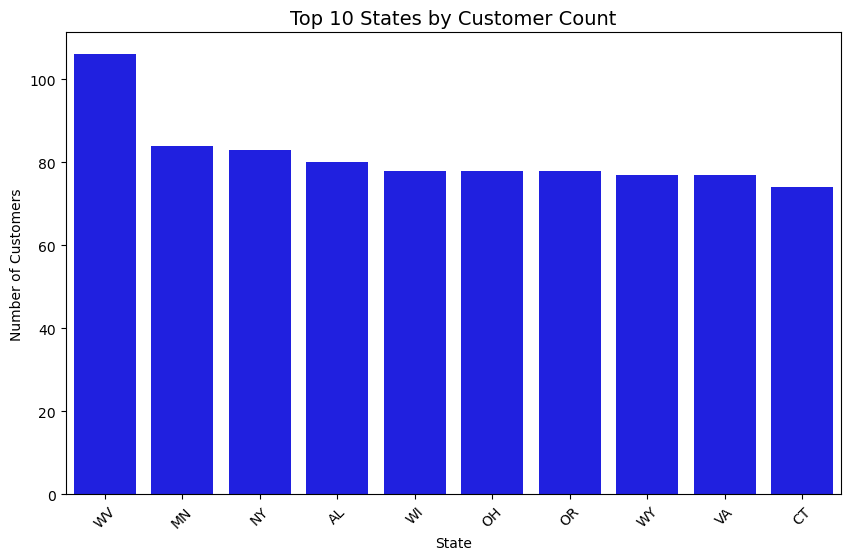

In [72]:
#Assign the variable state_counts to the top 10 states by customers
state_counts = df['state'].value_counts().head(10).reset_index()
state_counts.columns = ['state', 'count']

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=state_counts, x='state', y='count', color= 'blue')

plt.title("Top 10 States by Customer Count", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [66]:
state_counts = df['state'].value_counts().head(10)
state_counts


state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
Name: count, dtype: int64

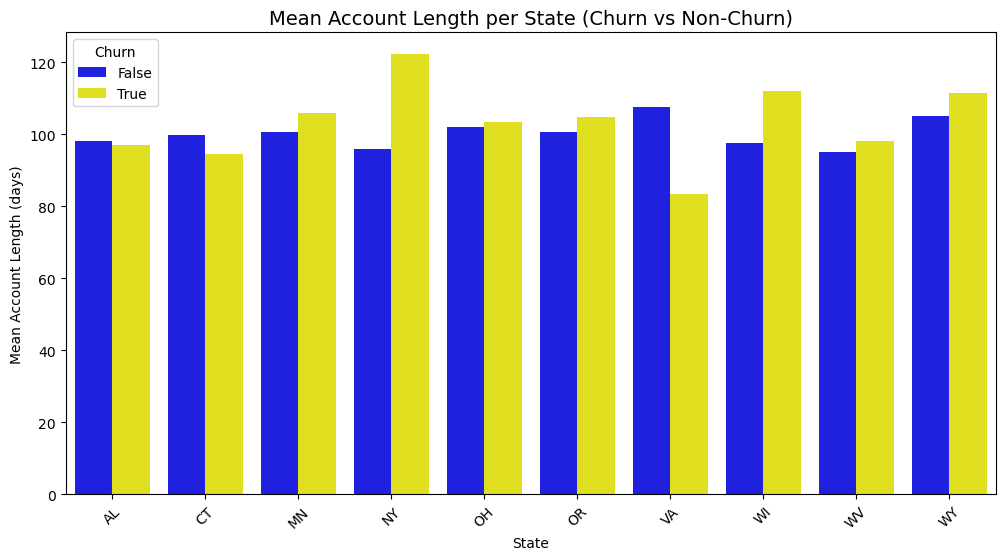

In [70]:
top_states = df['state'].value_counts().head(10).index

# Filter dataset for those states
df_top_states = df[df['state'].isin(top_states)]

# Group by state & churn, then compute mean account length
mean_acc_length = (
    df_top_states
    .groupby(['state', 'churn'])['account_length']
    .mean()
    .reset_index()
)

# Plot the mean acc length per state
plt.figure(figsize=(12,6))
sns.barplot(data=mean_acc_length, 
            x='state', y='account_length', 
            hue='churn', palette=['blue','yellow'])

plt.title("Mean Account Length per State (Churn vs Non-Churn)", fontsize=14)
plt.xlabel("State")
plt.ylabel("Mean Account Length (days)")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

#### The above table and visualization illustrates well how account length varies with churn. The states with the top mean account length are also indicated above as Alabama, Connecticut, Minnesota, Newyork and Ohio.


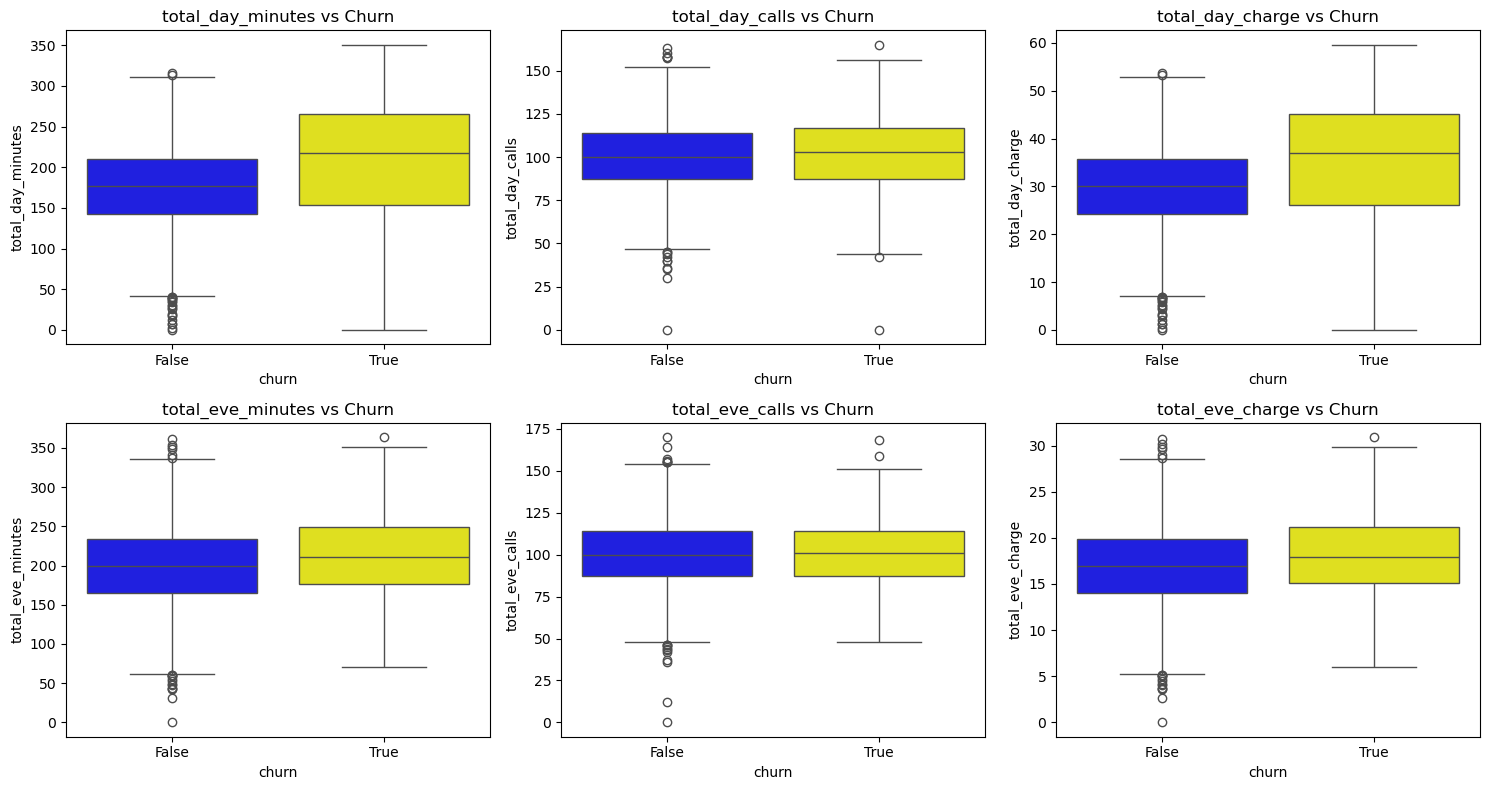

In [79]:
# We visualize different features against churn
features = [
    'total_day_minutes', 'total_day_calls', 'total_day_charge',
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
    'total_night_minutes', 'total_night_calls', 'total_night_charge',
    'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
    'customer_service_calls'
]

# Visualize boxplots for each feature against churn
plt.figure(figsize=(15, 8))
for i, col in enumerate(features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='churn', hue='churn', y=col, palette=["blue", "yellow"], legend= False)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

# Modelling

# Baseline model
creating  the baseline model with the selected features as :
feature= ['international plan', 'customer service calls', 'total day charge', 'total eve charge']
and the target variable is churn

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [85]:
# defining the variables
X = X = df_encoded[["international_plan", "customer_service_calls", 
        "total_day_charge", "total_eve_charge"]]
y = df_encoded["churn"]

In [87]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [89]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000,class_weight="balanced", solver= "liblinear")

# Fit the model
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [91]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

Baseline Logistic Regression Accuracy: 0.7496


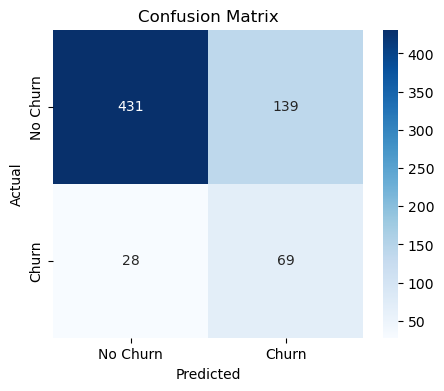


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.33      0.71      0.45        97

    accuracy                           0.75       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.75      0.78       667

ROC-AUC: 0.7337402785313801


In [93]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Logistic Regression Accuracy: {accuracy:.4f}")


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_pred))

## Logistic regression
Creating a logistic regression model with more features

In [96]:
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer

In [98]:
# Define X and y
# Drop target + unwanted one-hot encoded columns
X_log = df_encoded.drop(columns=['churn'] + 
                        [col for col in df_encoded.columns if col.startswith('state_')] + 
                        [col for col in df_encoded.columns if col.startswith('area_code_')])
# target variable
y_log = df_encoded['churn']

In [100]:
#perfoming Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log
)
# stratify ensures the same churn ratio in both train and test sets


In [102]:
#Scaling to ensure each feature contributes fairly t0 the model training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit only on train
X_test_scaled  = scaler.transform(X_test)        #transform test with same scaler

In [104]:
#Training the model
log_reg_model= LogisticRegression(max_iter=1000, class_weight="balanced",solver="liblinear")
log_reg_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [106]:
#  Evaluating
y_pred = log_reg_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[433 137]
 [ 25  72]]


In [108]:
# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7571214392803598

In [110]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.34      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



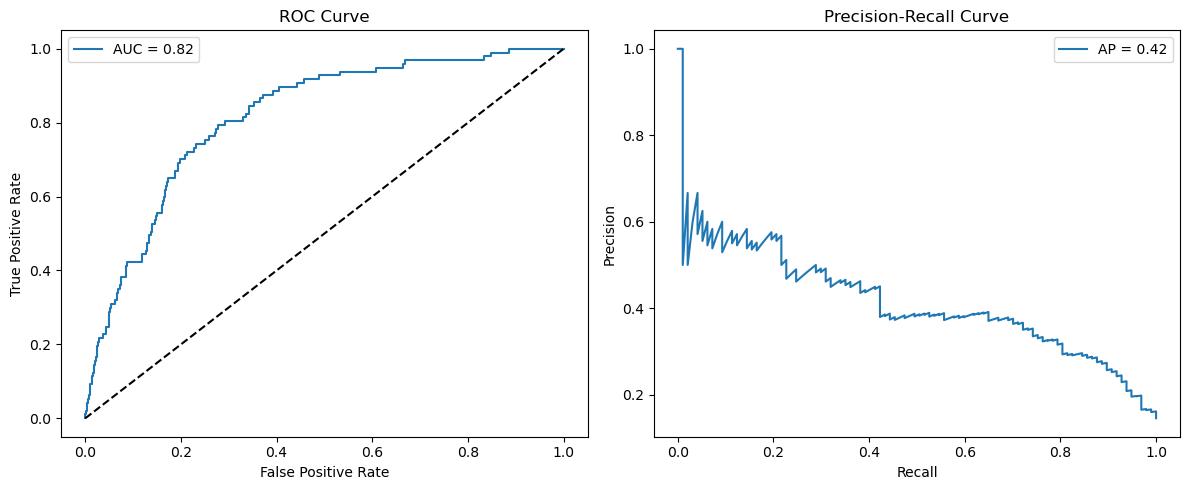

ROC-AUC: 0.7509585820220654
precision_recall_curve: 0.2931908238156362
average_ROC-AUC: 0.5220747029188508


In [114]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
# Probabilities for churn=1
y_proba = log_reg_model.predict_proba(X_test_scaled)[:,1]

# --- ROC ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

plt.subplot(1,2,2)
plt.plot(recall, precision, label=f"AP = {avg_prec:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()

print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("precision_recall_curve:",average_precision_score(y_test, y_pred))
print("average_ROC-AUC:", (roc_auc_score(y_test, y_pred) + average_precision_score(y_test, y_pred)) / 2)

- precision - how many are selected
- Recall - how many of the selected are relevant
- Precision measures how precise the predictions are, while Recall indicates what percentage of the classes we're interested in were actually captured by the model
- accuracy - "Out of all the predictions our model made, what percentage were correct?"
- F1_score -   F1 score represents the Harmonic Mean of Precision and Recall. In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around.

Logistic regression with class balancing improves recall for churners (0.70) but still suffers from low precision (0.42) and a modest F1-score (0.47). Despite an overall accuracy of 0.92 and ROC AUC of 0.82, the average precision of 0.47 shows limited reliability in identifying true churners, suggesting the need for more powerful models like decision trees or ensemble methods.

#Use ROC if classes are balanced #Use precision if chaurners are much fewer than non churners

# Decision tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree



In [122]:
# Decision Tree with class weight balancing
dtree = DecisionTreeClassifier(class_weight='balanced', 
                               random_state=42, 
                               max_depth=5,  # optional: controls overfitting
                               min_samples_split=10)  # optional


In [124]:
# Fit on training data (scaled not required for trees)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=10, random_state=42)

In [126]:
y_pred_tree = dtree.predict(X_test)


In [128]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Accuracy: 0.904047976011994

Confusion Matrix:
 [[532  38]
 [ 26  71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       570
           1       0.65      0.73      0.69        97

    accuracy                           0.90       667
   macro avg       0.80      0.83      0.82       667
weighted avg       0.91      0.90      0.91       667



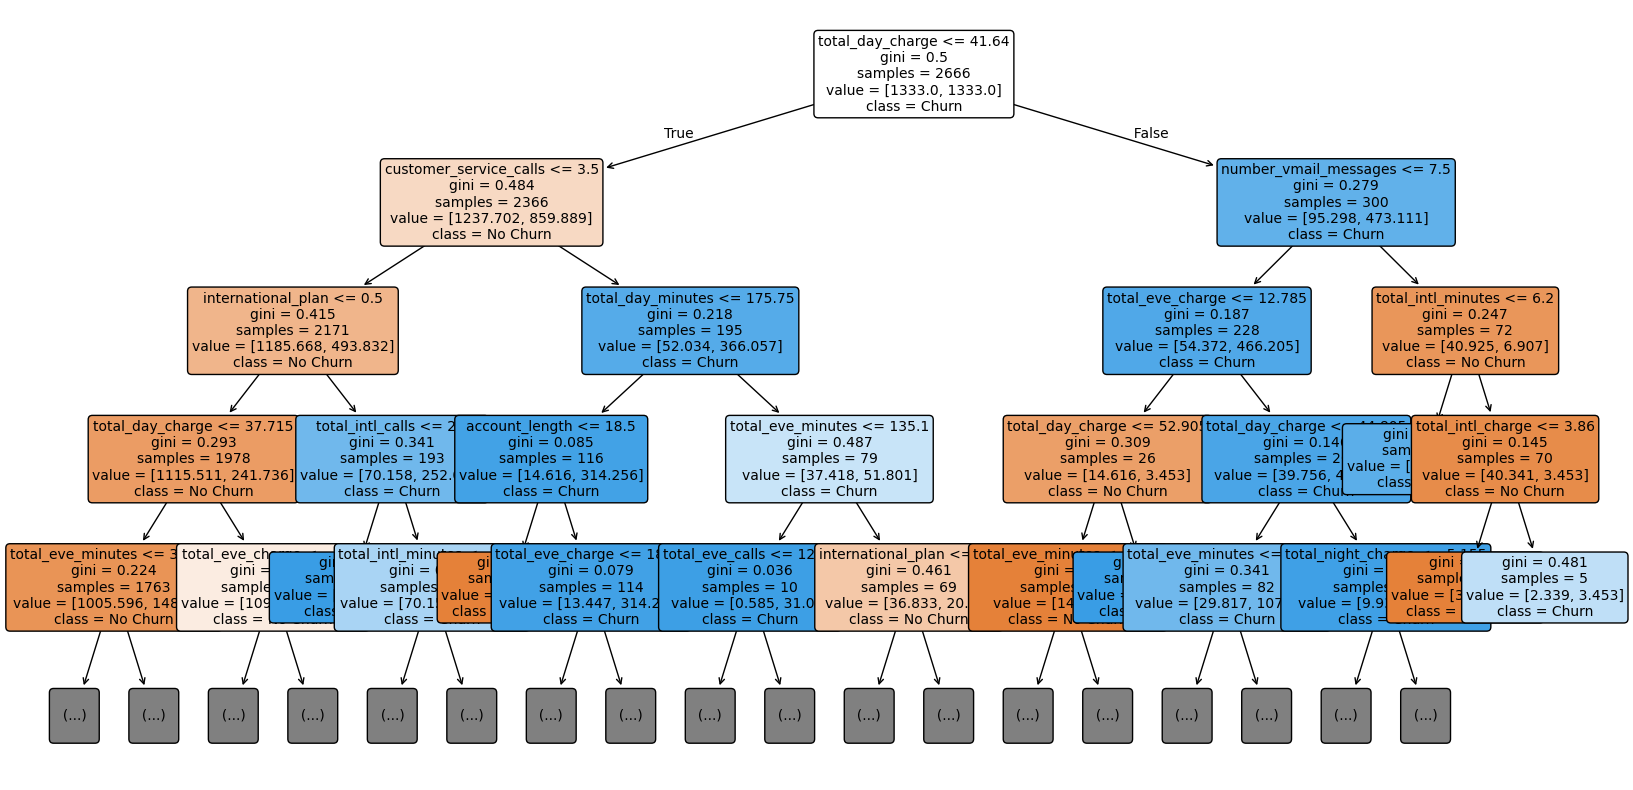

In [130]:
# Set figure size
plt.figure(figsize=(20,10))

# Ploting the tree
plot_tree(
    dtree,#the trained tree
    feature_names=X_train.columns, # feature names
    class_names=['No Churn', 'Churn'],# target classes
    filled=True,# color nodes by class
    rounded=True,# rounded boxes
    max_depth= 4,
    fontsize=10
)

plt.show()


In [132]:

# Feature importance
importances = dtree.feature_importances_

# Creating a dataframe for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
#sorting the features by importance
top10_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
# top features
top10_feature_importance_df


,Feature,Importance
16,customer_service_calls,0.248170
6,total_day_charge,0.230314
1,international_plan,0.218806
13,total_intl_minutes,0.083418
9,total_eve_charge,0.060476
3,number_vmail_messages,0.054189
7,total_eve_minutes,0.048589
14,total_intl_calls,0.022000
4,total_day_minutes,0.021630
12,total_night_charge,0.004883


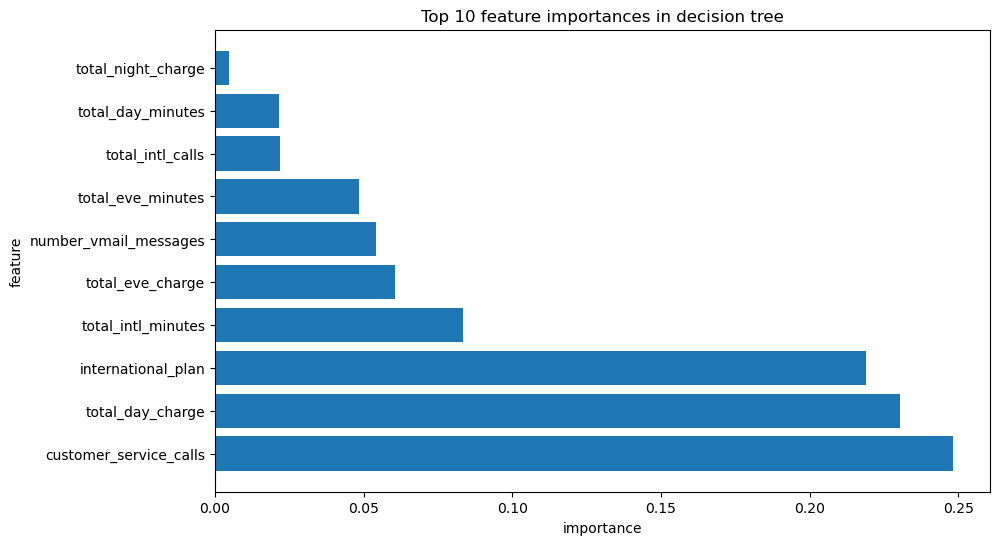

In [134]:
#plotting top 10 feature importances
plt.figure(figsize=(10,6))
plt.barh(
        top10_feature_importance_df["Feature"],
        top10_feature_importance_df["Importance"]
        )
plt.xlabel("importance")
plt.ylabel("feature")
plt.title("Top 10 feature importances in decision tree")
plt.show()

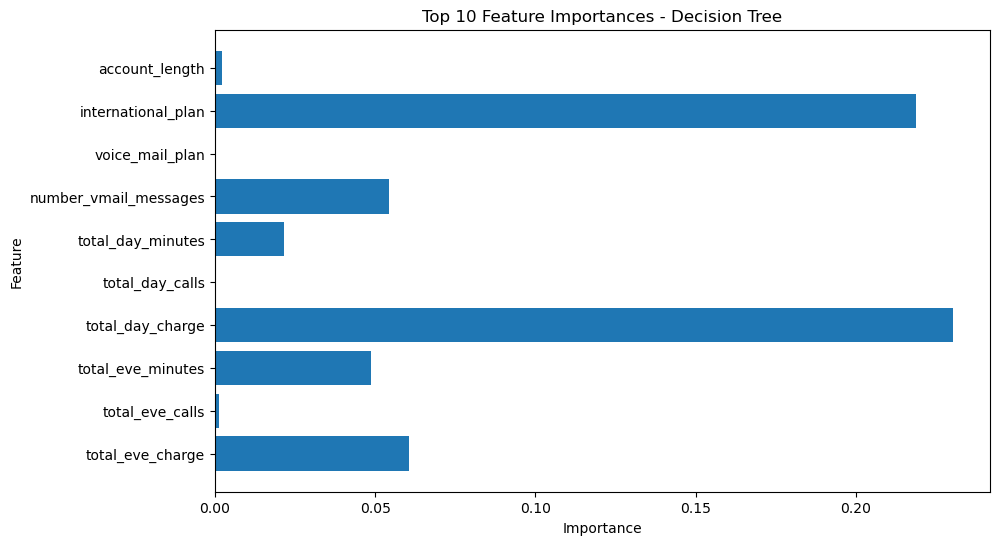

In [136]:
#plotting the feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances - Decision Tree")
plt.show()

# Random Forest

can we predict which customers are likely to churn?

In [140]:
# modeling with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


In [142]:
df_rf = df_encoded.copy()

In [144]:
df_rf = df_rf.drop(
    columns=[col for col in df_encoded.columns if col.startswith('state_') or col.startswith('area_code_')]
)
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   international_plan      3333 non-null   int64  
 2   voice_mail_plan         3333 non-null   int64  
 3   number_vmail_messages   3333 non-null   int64  
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_day_charge        3333 non-null   float64
 7   total_eve_minutes       3333 non-null   float64
 8   total_eve_calls         3333 non-null   int64  
 9   total_eve_charge        3333 non-null   float64
 10  total_night_minutes     3333 non-null   float64
 11  total_night_calls       3333 non-null   int64  
 12  total_night_charge      3333 non-null   float64
 13  total_intl_minutes      3333 non-null   float64
 14  total_intl_calls        3333 non-null   

In [146]:
df_rf.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

In [148]:
# dropping all charge columns
df_cols_drop= ["total_day_charge","total_intl_charge","total_eve_charge","total_night_charge"]
df_rf = df_rf.drop(columns=df_cols_drop)
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   international_plan      3333 non-null   int64  
 2   voice_mail_plan         3333 non-null   int64  
 3   number_vmail_messages   3333 non-null   int64  
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_eve_minutes       3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_intl_minutes      3333 non-null   float64
 11  total_intl_calls        3333 non-null   int64  
 12  customer_service_calls  3333 non-null   int64  
 13  churn                   3333 non-null   int32  
dtypes: float64(4), int32(1), int64(9)
memory

In [150]:
# splitting the data
X = df_rf.drop(columns=['churn'])
y = df_rf['churn']

In [152]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [154]:
# random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

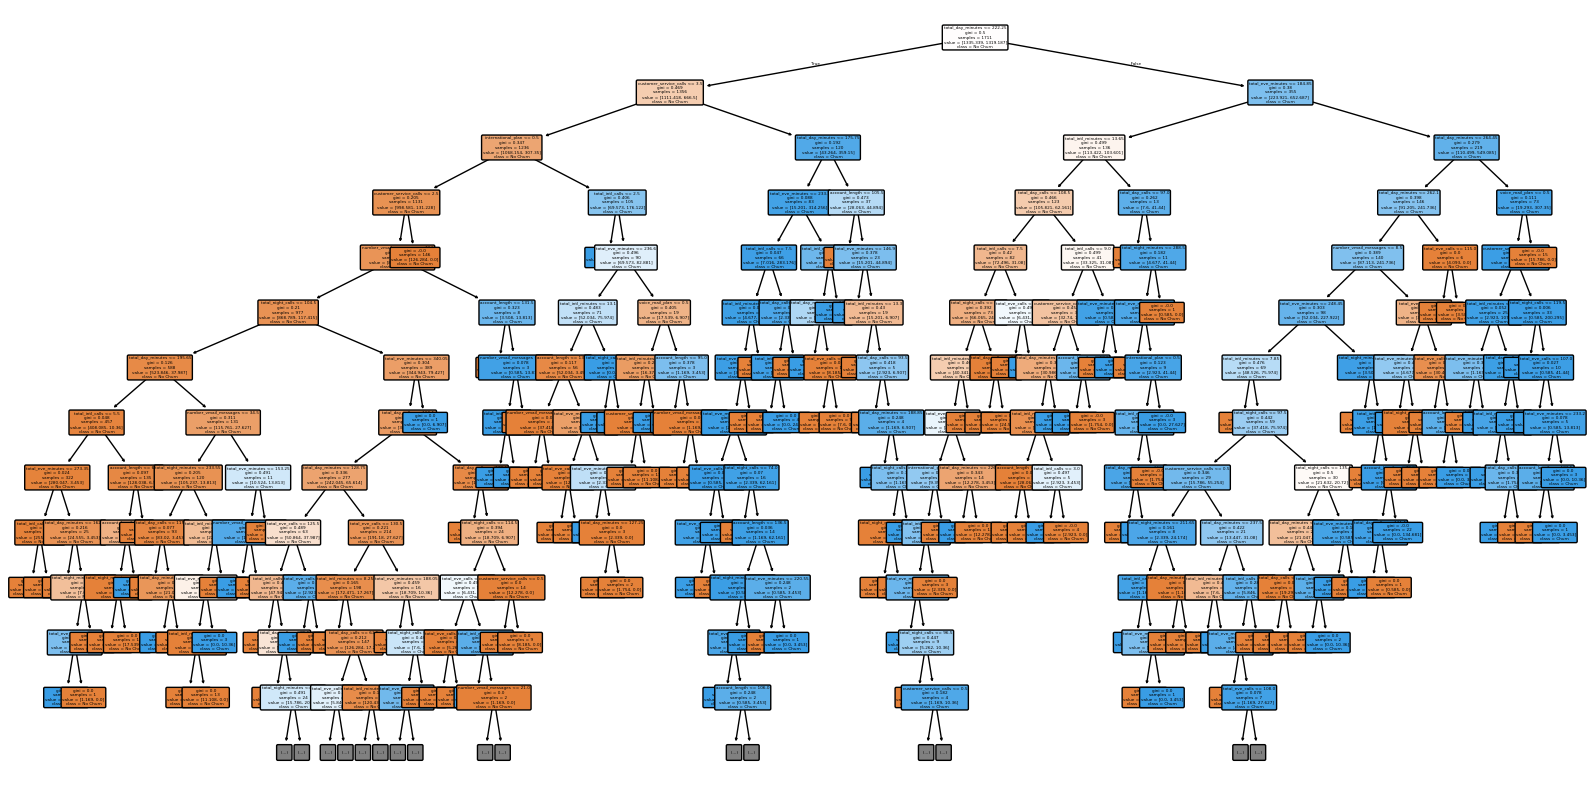

In [155]:
# visualize the tree
plt.figure(figsize=(20,10))
plot_tree(
    rf_model.estimators_[0],
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    max_depth=12,
    fontsize=3
)

plt.show()



In [157]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,            # only try 20 random combinations
    cv=3,                 # 3-fold CV instead of 5
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

# Evaluate
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best RF AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       570
           1       0.81      0.61      0.69        97

    accuracy                           0.92       667
   macro avg       0.87      0.79      0.82       667
weighted avg       0.92      0.92      0.92       667

Best RF AUC: 0.896301320311087


In [158]:
# random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")

# fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

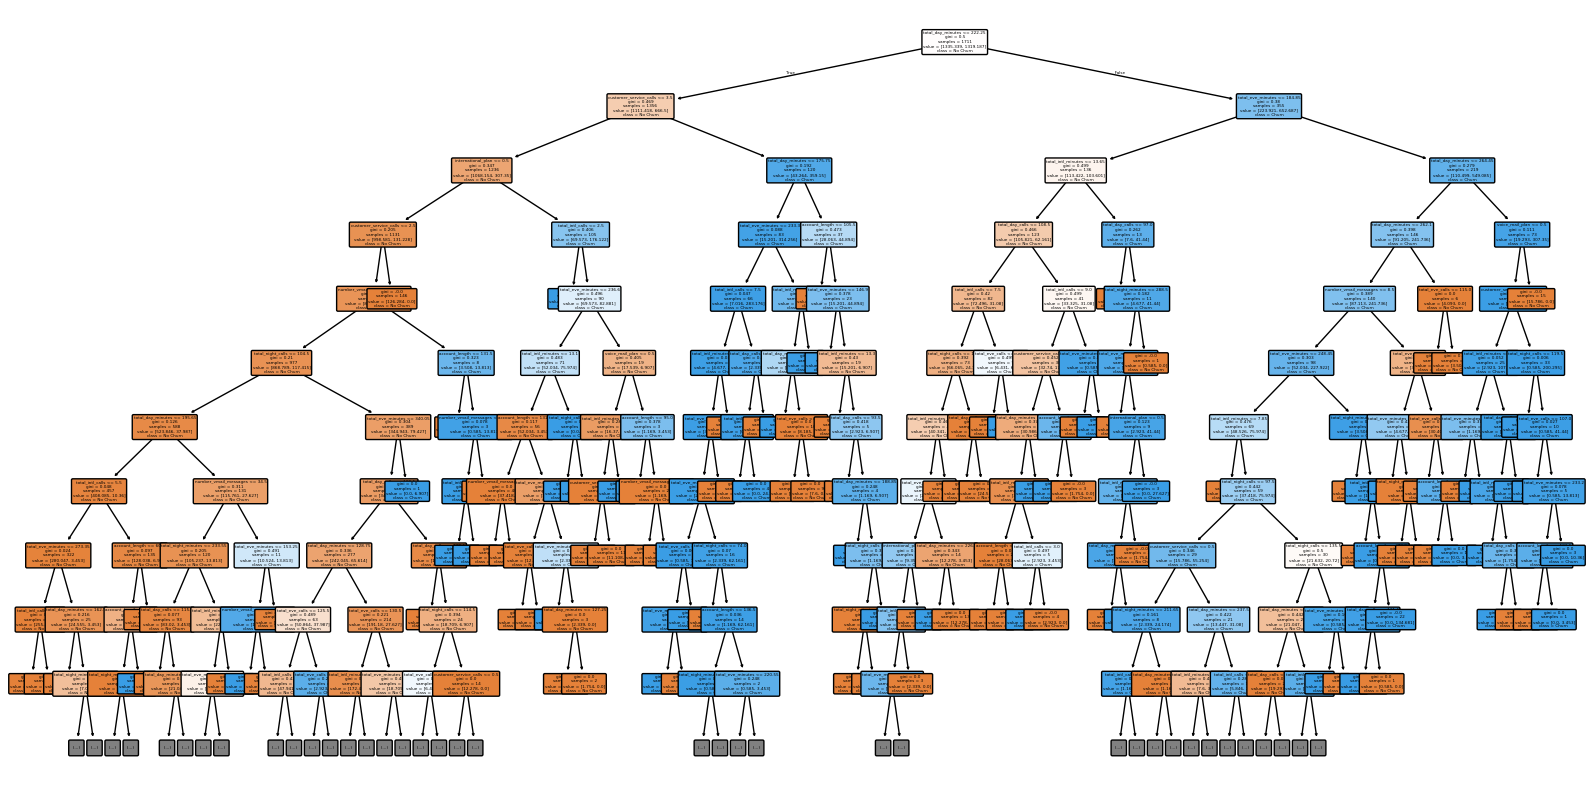

In [159]:
# visualize the tree
plt.figure(figsize=(20,10))
plot_tree(
    rf_model.estimators_[0],
    feature_names=X_train.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    max_depth=10,
    fontsize=3
)

plt.show()



In [160]:
# evaluating the model
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9265


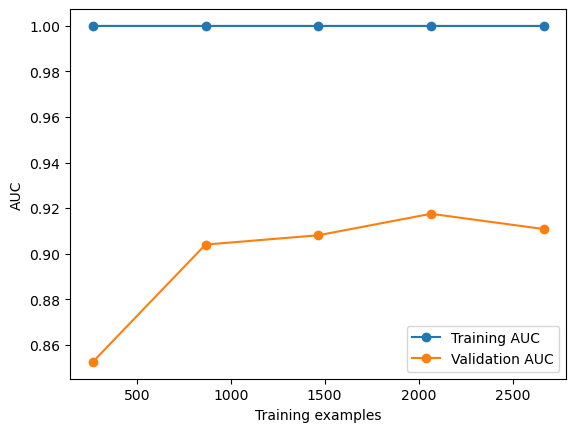

In [161]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training AUC")
plt.plot(train_sizes, test_mean, 'o-', label="Validation AUC")
plt.xlabel("Training examples")
plt.ylabel("AUC")
plt.legend()
plt.show()

- if there is a big gap it is overfitting, if the two lines converge it is a good fit